# Average Frequency Response of Samplings

In [1]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
from pathfinder import Pathfinder

relative_paths = [['..', '..', '..', '..', '..', '..', '資料科學', 'Allen Downey', 'Think DSP', 'code'],
                  ['..', '..', '..', '..', 'AutoEq'],
                  ['..', 'codes']]

Pathfinder.append_relative_paths(relative_paths)

# import pandas as pd

from drc.sound import Sound
# from drc.tuners.response.equalizer import ResponseEqualizer
# from drc.measurements.frequency.responses import FrequencyResponse
# from drc.filters.peq import PEQs

# Microphone settings

In [3]:
# from pprint import pprint

# pprint(Sound.scan_devices(0))

In [4]:
from drc.measurements.frequency.calibrations.miniDSP import UMIK1

fn_calibration = 'UMIK-1 cal file 7103946.txt'
# fn = 'UMIK-1 cal file 7103946_90deg.txt'

mic = UMIK1()
mic.load(file_name = fn_calibration, n_header_lines = 2);

# Utilities for sampling

In [5]:
def probe(input_device_idx, n_samplings = 1):
    return mic.get_frequency_response(input_device_idx = input_device_idx, n_samplings = n_samplings)

def probe_channels(input_device_idx, n_samplings = 1): 
    fr, _ = probe(input_device_idx, n_samplings)        
    fr.plot_graph(raw_plot_kwargs= {'color': 'green', 'alpha': 0.5},
                  smoothed_plot_kwargs= {'color': 'red', 'alpha': 0.5});

In [ ]:
errors = []

for n in range(1, 21, 1):
    _, fr_smoothed_0 = probe(input_device_idx = 1, n_samplings = n)
    _, fr_smoothed_1 = probe(input_device_idx = 1, n_samplings = n)

    mse = np.mean(np.square(fr_smoothed_0.raw - fr_smoothed_1.raw))
    errors.append((n, mse))
    print(n, mse)
    
errors = np.array(errors);

In [7]:
errors

array([[1.00000000e+00, 3.85242038e-01],
       [2.00000000e+00, 1.22791854e-01],
       [3.00000000e+00, 6.29573688e-02],
       [4.00000000e+00, 4.82844369e-02],
       [5.00000000e+00, 5.56469615e-02],
       [6.00000000e+00, 4.01120788e-02],
       [7.00000000e+00, 3.21902053e-02],
       [8.00000000e+00, 2.82500912e-02],
       [9.00000000e+00, 2.58262413e-02],
       [1.00000000e+01, 1.51358155e-02],
       [1.10000000e+01, 2.30919636e-02],
       [1.20000000e+01, 2.36806724e-02],
       [1.30000000e+01, 1.55157504e-02],
       [1.40000000e+01, 3.05123358e-02],
       [1.50000000e+01, 2.23393522e-02],
       [1.60000000e+01, 3.42055158e-02],
       [1.70000000e+01, 3.66062173e-02],
       [1.80000000e+01, 2.21636958e-02],
       [1.90000000e+01, 7.10172847e-02],
       [2.00000000e+01, 1.86101590e-02]])

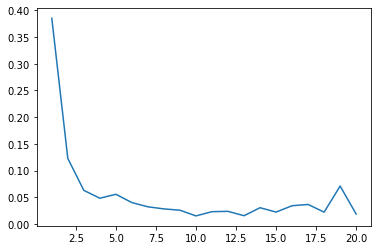

In [8]:
plt.plot(errors[:, 0], errors[:,1]);

C:\Softwares\Python\lib\site-packages\numpy\fft\_pocketfft.py:70: ComplexWarning: Casting complex values to real discards the imaginary part
  r = pfi.execute(a, is_real, is_forward, fct)


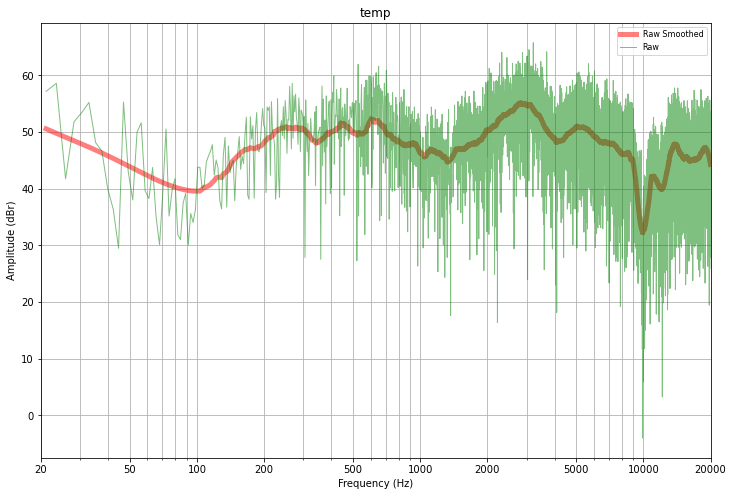

In [9]:
probe_channels(input_device_idx = 1, n_samplings = 1)

C:\Softwares\Python\lib\site-packages\numpy\fft\_pocketfft.py:70: ComplexWarning: Casting complex values to real discards the imaginary part
  r = pfi.execute(a, is_real, is_forward, fct)


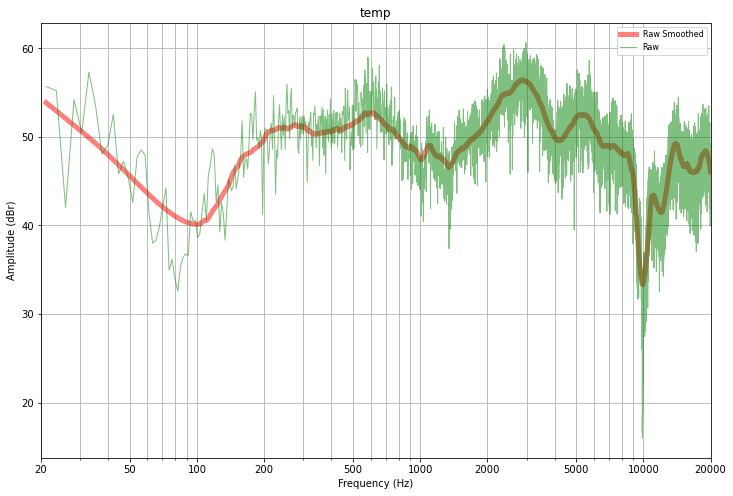

In [10]:
probe_channels(input_device_idx = 1, n_samplings = 5)

C:\Softwares\Python\lib\site-packages\numpy\fft\_pocketfft.py:70: ComplexWarning: Casting complex values to real discards the imaginary part
  r = pfi.execute(a, is_real, is_forward, fct)


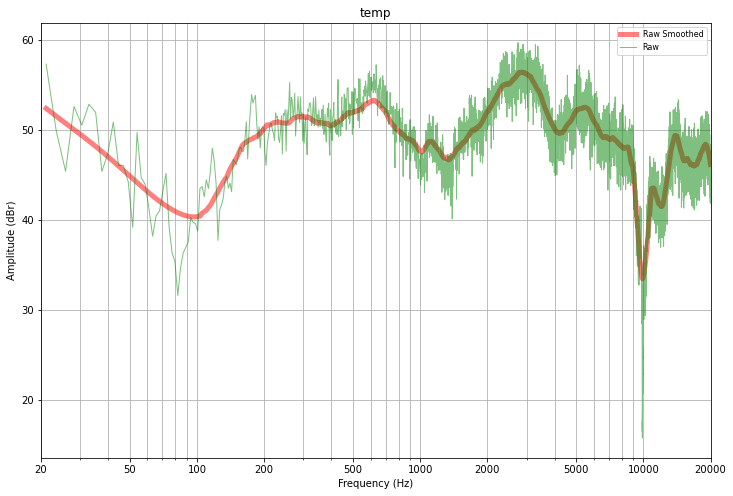

In [11]:
probe_channels(input_device_idx = 1, n_samplings = 10)

C:\Softwares\Python\lib\site-packages\numpy\fft\_pocketfft.py:70: ComplexWarning: Casting complex values to real discards the imaginary part
  r = pfi.execute(a, is_real, is_forward, fct)


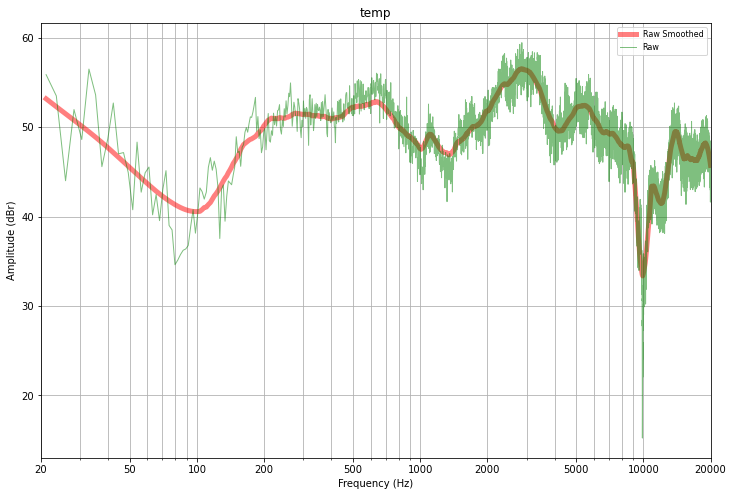

In [12]:
probe_channels(input_device_idx = 1, n_samplings = 15)

C:\Softwares\Python\lib\site-packages\numpy\fft\_pocketfft.py:70: ComplexWarning: Casting complex values to real discards the imaginary part
  r = pfi.execute(a, is_real, is_forward, fct)


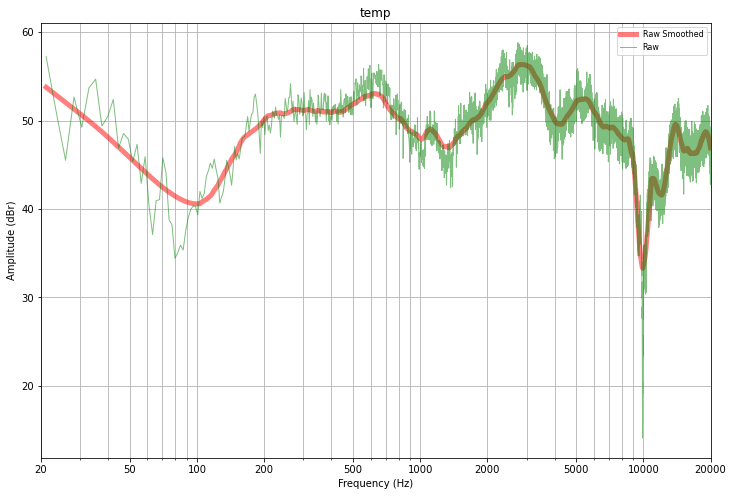

In [13]:
probe_channels(input_device_idx = 1, n_samplings = 20)

# Conclusion:
n_samplings >= 10 is recommanded for consistance.